# Imports

data can be found at : https://www.kaggle.com/competitions/store-sales-time-series-forecasting/data

In [1]:
import pandas as pd
import numpy as np
import statsmodels
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder

# Data

In [2]:
holydays_event = pd.read_csv("./store-sales-time-series-forecasting/holidays_events.csv",
parse_dates=['date'])

In [3]:
oil = pd.read_csv("./store-sales-time-series-forecasting/oil.csv",
                  parse_dates=['date'])
stores = pd.read_csv("./store-sales-time-series-forecasting/stores.csv",
                     )

In [4]:
test = pd.read_csv("./store-sales-time-series-forecasting/test.csv",
                   parse_dates=['date'],)
train = pd.read_csv("./store-sales-time-series-forecasting/train.csv",
                    parse_dates=['date'],)
transactions = pd.read_csv("./store-sales-time-series-forecasting/transactions.csv")

## Train & Test

In [5]:
train.head(5)

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


In [6]:
date_end = train.date.max()
date_start = train.date.min()

In [7]:
f'the date range of the train table starts from {date_start} and ends at {date_end}'

'the date range of the train table starts from 2013-01-01 00:00:00 and ends at 2017-08-15 00:00:00'

In [8]:
test.head()

,id,date,store_nbr,family,onpromotion
0,3000888,2017-08-16,1,AUTOMOTIVE,0
1,3000889,2017-08-16,1,BABY CARE,0
2,3000890,2017-08-16,1,BEAUTY,2
3,3000891,2017-08-16,1,BEVERAGES,20
4,3000892,2017-08-16,1,BOOKS,0


In [9]:
date_end = test.date.max()
date_start = test.date.min()

In [10]:
f'the date range of the test table starts from {date_start} and ends at {date_end}'

'the date range of the test table starts from 2017-08-16 00:00:00 and ends at 2017-08-31 00:00:00'

## Holidyas event

In [11]:
holydays_event.head(10)

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False
5,2012-05-12,Holiday,Local,Puyo,Cantonizacion del Puyo,False
6,2012-06-23,Holiday,Local,Guaranda,Cantonizacion de Guaranda,False
7,2012-06-25,Holiday,Regional,Imbabura,Provincializacion de Imbabura,False
8,2012-06-25,Holiday,Local,Latacunga,Cantonizacion de Latacunga,False
9,2012-06-25,Holiday,Local,Machala,Fundacion de Machala,False


In [12]:
holydays_event.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         350 non-null    datetime64[ns]
 1   type         350 non-null    object        
 2   locale       350 non-null    object        
 3   locale_name  350 non-null    object        
 4   description  350 non-null    object        
 5   transferred  350 non-null    bool          
dtypes: bool(1), datetime64[ns](1), object(4)
memory usage: 14.1+ KB


In [13]:
holydays_event.describe().T

C:\Users\atcho\AppData\Local\Temp\ipykernel_115856\3494258670.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  holydays_event.describe().T


,count,unique,top,freq,first,last
date,350,312,2014-06-25 00:00:00,4,2012-03-02,2017-12-26
type,350,6,Holiday,221,NaT,NaT
locale,350,3,National,174,NaT,NaT
locale_name,350,24,Ecuador,174,NaT,NaT
description,350,103,Carnaval,10,NaT,NaT
transferred,350,2,False,338,NaT,NaT


In [14]:
holydays_event[holydays_event.duplicated(['date'], keep=False)]

,date,type,locale,locale_name,description,transferred
7,2012-06-25,Holiday,Regional,Imbabura,Provincializacion de Imbabura,False
8,2012-06-25,Holiday,Local,Latacunga,Cantonizacion de Latacunga,False
9,2012-06-25,Holiday,Local,Machala,Fundacion de Machala,False
10,2012-07-03,Holiday,Local,Santo Domingo,Fundacion de Santo Domingo,False
11,2012-07-03,Holiday,Local,El Carmen,Cantonizacion de El Carmen,False
...,...,...,...,...,...,...
319,2017-07-03,Holiday,Local,Santo Domingo,Fundacion de Santo Domingo,False
341,2017-12-08,Holiday,Local,Loja,Fundacion de Loja,False
342,2017-12-08,Transfer,Local,Quito,Traslado Fundacion de Quito,False
344,2017-12-22,Holiday,Local,Salinas,Cantonizacion de Salinas,False


holiday event have duplicated row since one day can correspond to multiple event or can be a holiday in certain regions but not in others.
We could add additional boolean columns to represent those data and delete duplicate rows.
Because we do not really know the localisation of each store in our dataset we will focus on the day type

In [15]:
holydays_event.type.unique()

array(['Holiday', 'Transfer', 'Additional', 'Bridge', 'Work Day', 'Event'],
      dtype=object)

In [16]:
# wd for work day, add this boolean column to differentiate work day from holidays
# added a event column to specified if there was an event on that specific day, which can lead to more consumption
holydays_event["wd"] = False
holydays_event['isevent'] = False

In [17]:
holydays_event.loc[holydays_event.type == 'Work Day'  , 'wd'] = True
holydays_event.loc[(holydays_event.type == 'Additional') & (holydays_event.transferred == True), 'wd'] = True
holydays_event.loc[(holydays_event.type == 'Holiday') & (holydays_event.transferred == True), 'wd'] = True

In [18]:
holydays_event.loc[holydays_event.type == 'Event'  , 'isevent'] = True

In [19]:
# drop unused columns
holydays_event.drop(columns=['locale_name','locale', 'transferred','description'], inplace=True)

In [20]:
# drop duplicate
holydays_event= holydays_event.drop_duplicates(['date', 'type'], keep='first')

In [21]:
# if workday = false mean its holydays, to keep days when an event took place we keep last
holydays_event= holydays_event.drop_duplicates(['date'], keep='last')

In [22]:
holydays_event[holydays_event.duplicated(['date'], keep=False)]

,date,type,wd,isevent


In [23]:
# now that we created the 'wd'  column we can get rid of the type data
holydays_event.drop(columns=['type'], inplace= True )

In [24]:
date_start = holydays_event.date.min()
date_end = holydays_event.date.max()

In [25]:
f'the date range of the transaction table starts from {date_start} and ends at {date_end}'

'the date range of the transaction table starts from 2012-03-02 00:00:00 and ends at 2017-12-26 00:00:00'

## Stores

In [26]:
stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   store_nbr  54 non-null     int64 
 1   city       54 non-null     object
 2   state      54 non-null     object
 3   type       54 non-null     object
 4   cluster    54 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 2.2+ KB


In [27]:
stores.describe().T

,count,mean,std,min,25%,50%,75%,max
store_nbr,54.0,27.500000,15.732133,1.0,14.25,27.5,40.75,54.0
cluster,54.0,8.481481,4.693395,1.0,4.00,8.5,13.00,17.0


In [28]:
stores.head(5)

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


## Oil

In [29]:
oil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        1218 non-null   datetime64[ns]
 1   dcoilwtico  1175 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 19.2 KB


In [30]:
oil.describe().T

,count,mean,std,min,25%,50%,75%,max
dcoilwtico,1175.0,67.714366,25.630476,26.19,46.405,53.19,95.66,110.62


In [31]:
oil.head(5)

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20


In [32]:
date_end = oil.date.max()
date_start = oil.date.min()

In [33]:
f'the date range of the transaction table starts from {date_start} and ends at {date_end}'

'the date range of the transaction table starts from 2013-01-01 00:00:00 and ends at 2017-08-31 00:00:00'

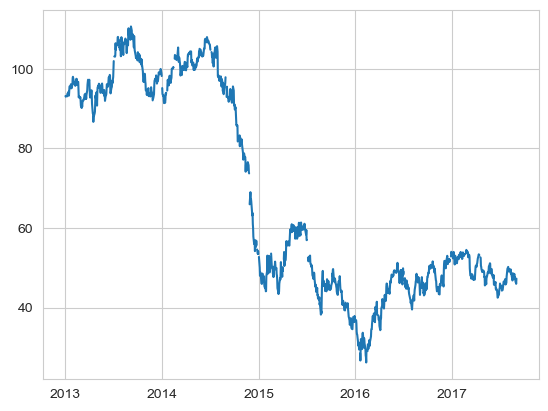

In [34]:
plt.plot(oil['date'], oil['dcoilwtico'])
plt.show()

Obviously there are missing values in the oil table, I have decided to use de "backfill" method, which consists of filling the missing value with the value of the next day

In [35]:
oil = oil.fillna(method="backfill")

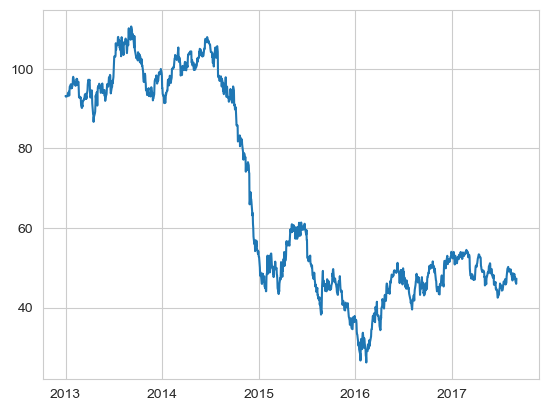

In [36]:
plt.plot(oil['date'], oil['dcoilwtico'])
plt.show()

## Transactions

In [37]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83488 entries, 0 to 83487
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          83488 non-null  object
 1   store_nbr     83488 non-null  int64 
 2   transactions  83488 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.9+ MB


In [38]:
transactions.describe().T

,count,mean,std,min,25%,50%,75%,max
store_nbr,83488.0,26.939237,15.608204,1.0,13.0,27.0,40.0,54.0
transactions,83488.0,1694.602158,963.286644,5.0,1046.0,1393.0,2079.0,8359.0


In [39]:
transactions.head(5)

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


In [40]:
transactions.tail(5)

,date,store_nbr,transactions
83483,2017-08-15,50,2804
83484,2017-08-15,51,1573
83485,2017-08-15,52,2255
83486,2017-08-15,53,932
83487,2017-08-15,54,802


In [41]:
date_end = transactions.date.max()
date_start = transactions.date.min()

In [42]:
f'the date range of the transaction table starts from {date_start} and ends at {date_end}'

'the date range of the transaction table starts from 2013-01-01 and ends at 2017-08-15'

Transactions data are only fitting the date range of the training set and not the test set, one can wonder if this dataset is useful in this situation. In a another situation it could have been usefull to use this dataset but, in this case, using this dataset could lead the model to errors.

# Data preparation

In [43]:
le = LabelEncoder()
Oe = OrdinalEncoder()

## Training set

In [44]:
# take a sample of the training set to try to visualise the data
train_sample = train[train["store_nbr"]==1].copy()

In [45]:
train_sample['date'] = train_sample['date'].dt.to_period("M")

In [46]:
train_sample = train_sample.groupby(['date', 'family']).sum().reset_index()

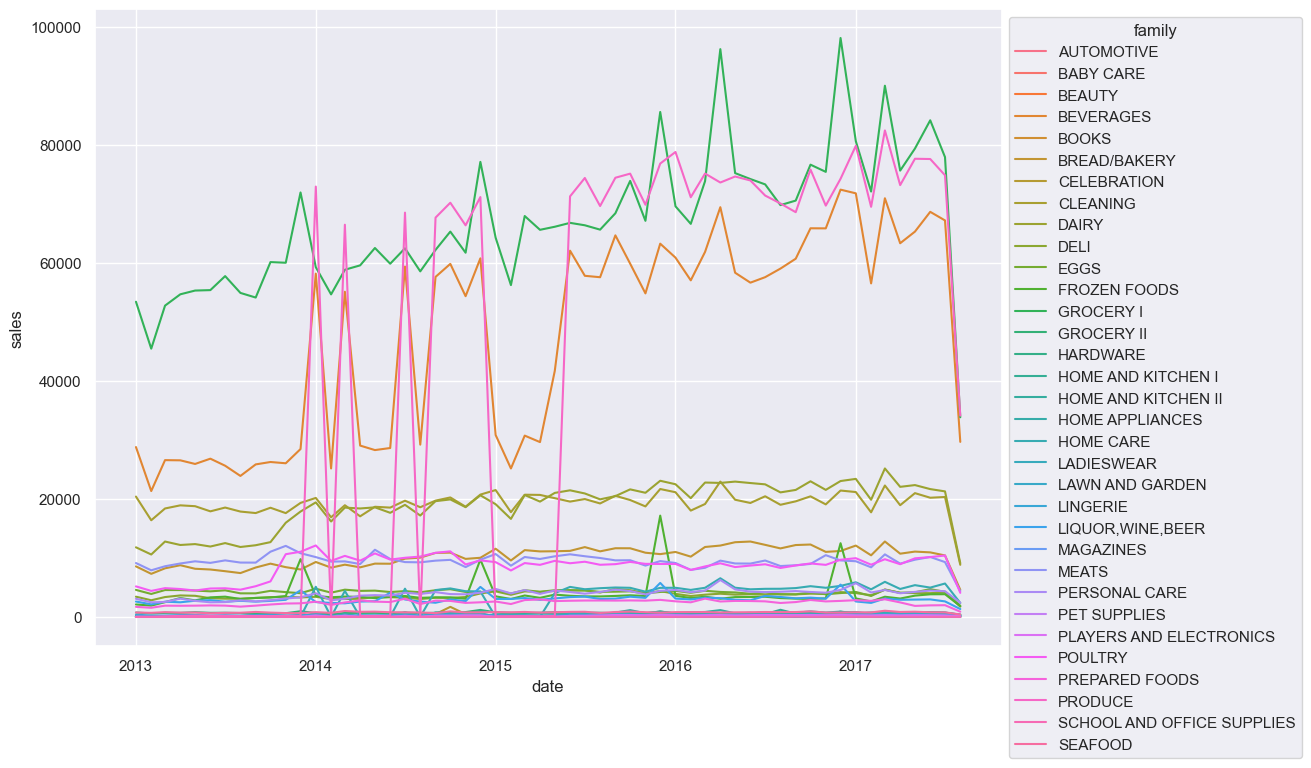

In [47]:
%matplotlib inline
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.lineplot(x=train_sample['date'].astype('datetime64[M]'), y=train_sample['sales'], hue= train_sample['family'])
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.show()

In [48]:
oil.rename(columns={"dcoilwtico":'oil_price'}, inplace=True)

In [49]:
# merging train with oil
train = pd.merge(train, oil, on='date', how='left')

In [50]:
# mmerging train with stores
train = pd.merge(train, stores, on='store_nbr', how='left')

In [51]:
train.isnull().sum()

id                  0
date                0
store_nbr           0
family              0
sales               0
onpromotion         0
oil_price      857142
city                0
state               0
type                0
cluster             0
dtype: int64

In [52]:
# use the same strategy to fill null oil data
train['oil_price'] = train.oil_price.fillna(method="backfill")

In [53]:
# merge train set with hollidays envents
train = pd.merge( train, holydays_event, on="date", how="left")

In [54]:
train.isnull().sum()

id                   0
date                 0
store_nbr            0
family               0
sales                0
onpromotion          0
oil_price            0
city                 0
state                0
type                 0
cluster              0
wd             2551824
isevent        2551824
dtype: int64

Since the table holidays event gives info only about the holidays, we assume that the null data are working days

In [55]:
train.loc[train.isna().any(axis=1), ['wd', 'isevent']]= True, False

In [56]:
stores_list = sorted(list(train.store_nbr.unique()))

In [57]:
train.set_index(['id'], inplace=True)

In [58]:
train['isevent']

id
0          False
1          False
2          False
3          False
4          False
           ...  
3000883    False
3000884    False
3000885    False
3000886    False
3000887    False
Name: isevent, Length: 3000888, dtype: object

In [59]:
train

,date,store_nbr,family,sales,onpromotion,oil_price,city,state,type,cluster,wd,isevent
id,,,,,,,,,,,,
0,2013-01-01,1,AUTOMOTIVE,0.000,0,93.14,Quito,Pichincha,D,13,False,False
1,2013-01-01,1,BABY CARE,0.000,0,93.14,Quito,Pichincha,D,13,False,False
2,2013-01-01,1,BEAUTY,0.000,0,93.14,Quito,Pichincha,D,13,False,False
3,2013-01-01,1,BEVERAGES,0.000,0,93.14,Quito,Pichincha,D,13,False,False
4,2013-01-01,1,BOOKS,0.000,0,93.14,Quito,Pichincha,D,13,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
3000883,2017-08-15,9,POULTRY,438.133,0,47.57,Quito,Pichincha,B,6,False,False
3000884,2017-08-15,9,PREPARED FOODS,154.553,1,47.57,Quito,Pichincha,B,6,False,False
3000885,2017-08-15,9,PRODUCE,2419.729,148,47.57,Quito,Pichincha,B,6,False,False


In [60]:
train[['family', 'city', 'state', 'type', 'wd', 'isevent']] = Oe.fit_transform(train[['family', 'city', 'state', 'type', 'wd', 'isevent']])

In [61]:
train

,date,store_nbr,family,sales,onpromotion,oil_price,city,state,type,cluster,wd,isevent
id,,,,,,,,,,,,
0,2013-01-01,1,0.0,0.000,0,93.14,18.0,12.0,3.0,13,0.0,0.0
1,2013-01-01,1,1.0,0.000,0,93.14,18.0,12.0,3.0,13,0.0,0.0
2,2013-01-01,1,2.0,0.000,0,93.14,18.0,12.0,3.0,13,0.0,0.0
3,2013-01-01,1,3.0,0.000,0,93.14,18.0,12.0,3.0,13,0.0,0.0
4,2013-01-01,1,4.0,0.000,0,93.14,18.0,12.0,3.0,13,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3000883,2017-08-15,9,28.0,438.133,0,47.57,18.0,12.0,1.0,6,0.0,0.0
3000884,2017-08-15,9,29.0,154.553,1,47.57,18.0,12.0,1.0,6,0.0,0.0
3000885,2017-08-15,9,30.0,2419.729,148,47.57,18.0,12.0,1.0,6,0.0,0.0


## Testing set

In [62]:
test = pd.merge(test, oil, on='date', how='left')

In [63]:
test = pd.merge(test, stores, on='store_nbr', how='left')

In [64]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28512 entries, 0 to 28511
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   id           28512 non-null  int64         
 1   date         28512 non-null  datetime64[ns]
 2   store_nbr    28512 non-null  int64         
 3   family       28512 non-null  object        
 4   onpromotion  28512 non-null  int64         
 5   oil_price    21384 non-null  float64       
 6   city         28512 non-null  object        
 7   state        28512 non-null  object        
 8   type         28512 non-null  object        
 9   cluster      28512 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(4), object(4)
memory usage: 2.4+ MB


In [65]:
test.isnull().sum()

id                0
date              0
store_nbr         0
family            0
onpromotion       0
oil_price      7128
city              0
state             0
type              0
cluster           0
dtype: int64

In [66]:
# use the same strategy to fill null oil data
test['oil_price'] = test.oil_price.fillna(method="backfill")

In [67]:
# merge train set with hollidays envents
test = pd.merge( test, holydays_event, on="date", how="left")

In [68]:
test.loc[test.isna().any(axis=1), ['wd', 'isevent']]= True, False

In [69]:
test.set_index(["id"], inplace=True)

In [70]:
test[['family', 'city', 'state', 'type', 'wd', 'isevent']] = Oe.transform(test[['family', 'city', 'state', 'type', 'wd', 'isevent']])

In [71]:
test

,date,store_nbr,family,onpromotion,oil_price,city,state,type,cluster,wd,isevent
id,,,,,,,,,,,
3000888,2017-08-16,1,0.0,0,46.80,18.0,12.0,3.0,13,1.0,0.0
3000889,2017-08-16,1,1.0,0,46.80,18.0,12.0,3.0,13,1.0,0.0
3000890,2017-08-16,1,2.0,2,46.80,18.0,12.0,3.0,13,1.0,0.0
3000891,2017-08-16,1,3.0,20,46.80,18.0,12.0,3.0,13,1.0,0.0
3000892,2017-08-16,1,4.0,0,46.80,18.0,12.0,3.0,13,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
3029395,2017-08-31,9,28.0,1,47.26,18.0,12.0,1.0,6,1.0,0.0
3029396,2017-08-31,9,29.0,0,47.26,18.0,12.0,1.0,6,1.0,0.0
3029397,2017-08-31,9,30.0,1,47.26,18.0,12.0,1.0,6,1.0,0.0


# Model

## Imports

In [72]:
from sklearn.model_selection import train_test_split
from lazypredict.Supervised import LazyRegressor

## Test

In [77]:
# take a sample of the datset
sample = round(train['date'].count() *0.1)
train_for_test = train.sample(sample, random_state=0, replace = False).reset_index()

In [78]:
y = train_for_test['sales']

In [83]:
X = train_for_test.drop(['sales', 'id'], axis=1)

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.5,random_state =123)

In [93]:
reg = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None)

In [94]:
models,predictions = reg.fit(X_train, X_test, y_train, y_test)

100%|██████████| 42/42 [51:06<00:00, 73.02s/it]   


,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
XGBRegressor,0.85,0.85,428.41,1.52
HistGradientBoostingRegressor,0.84,0.84,432.75,1.33
LGBMRegressor,0.84,0.84,433.17,0.47
RandomForestRegressor,0.84,0.84,441.18,34.07
BaggingRegressor,0.81,0.81,472.05,3.62
ExtraTreesRegressor,0.79,0.79,497.23,27.94
GradientBoostingRegressor,0.70,0.70,600.48,8.07
DecisionTreeRegressor,0.69,0.69,606.46,0.59
ExtraTreeRegressor,0.66,0.66,638.11,0.34


In [95]:
models[:4]

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
XGBRegressor,0.85,0.85,428.41,1.52
HistGradientBoostingRegressor,0.84,0.84,432.75,1.33
LGBMRegressor,0.84,0.84,433.17,0.47
RandomForestRegressor,0.84,0.84,441.18,34.07
